In [1]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from termcolor import colored

#from markupsafe import escape
#!pip install pandas-profiling
#import pandas_profiling
!pip install sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install lightgbm

from lightgbm import LGBMClassifier

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#see model parametres
from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", "green"))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=7b90401c9a198777136b3c73b26dbc787685fef2fd0d06330a97cb021a67ec06
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


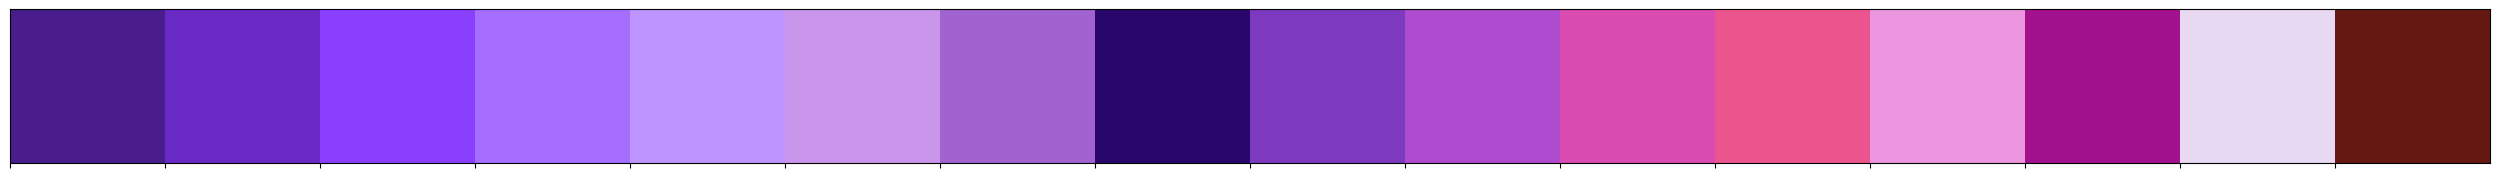

In [2]:
purple = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

sns.palplot(purple, size = 2)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/Colab Notebooks/DataMiningColabJordanFuchs/

/content/drive/My Drive/Colab Notebooks/DataMiningColabJordanFuchs


In [5]:
wine = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataMiningColabJordanFuchs/winequality-red.csv')
df = wine.copy()
df.head(n = 10).style.background_gradient(cmap = "Purples_r")


In [6]:
df.describe().T.style.background_gradient(cmap = "magma")

In [7]:
print("In total there are {} null values in the dataset.".format(df.isnull().sum().sum()))

In total there are 0 null values in the dataset.


In [8]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

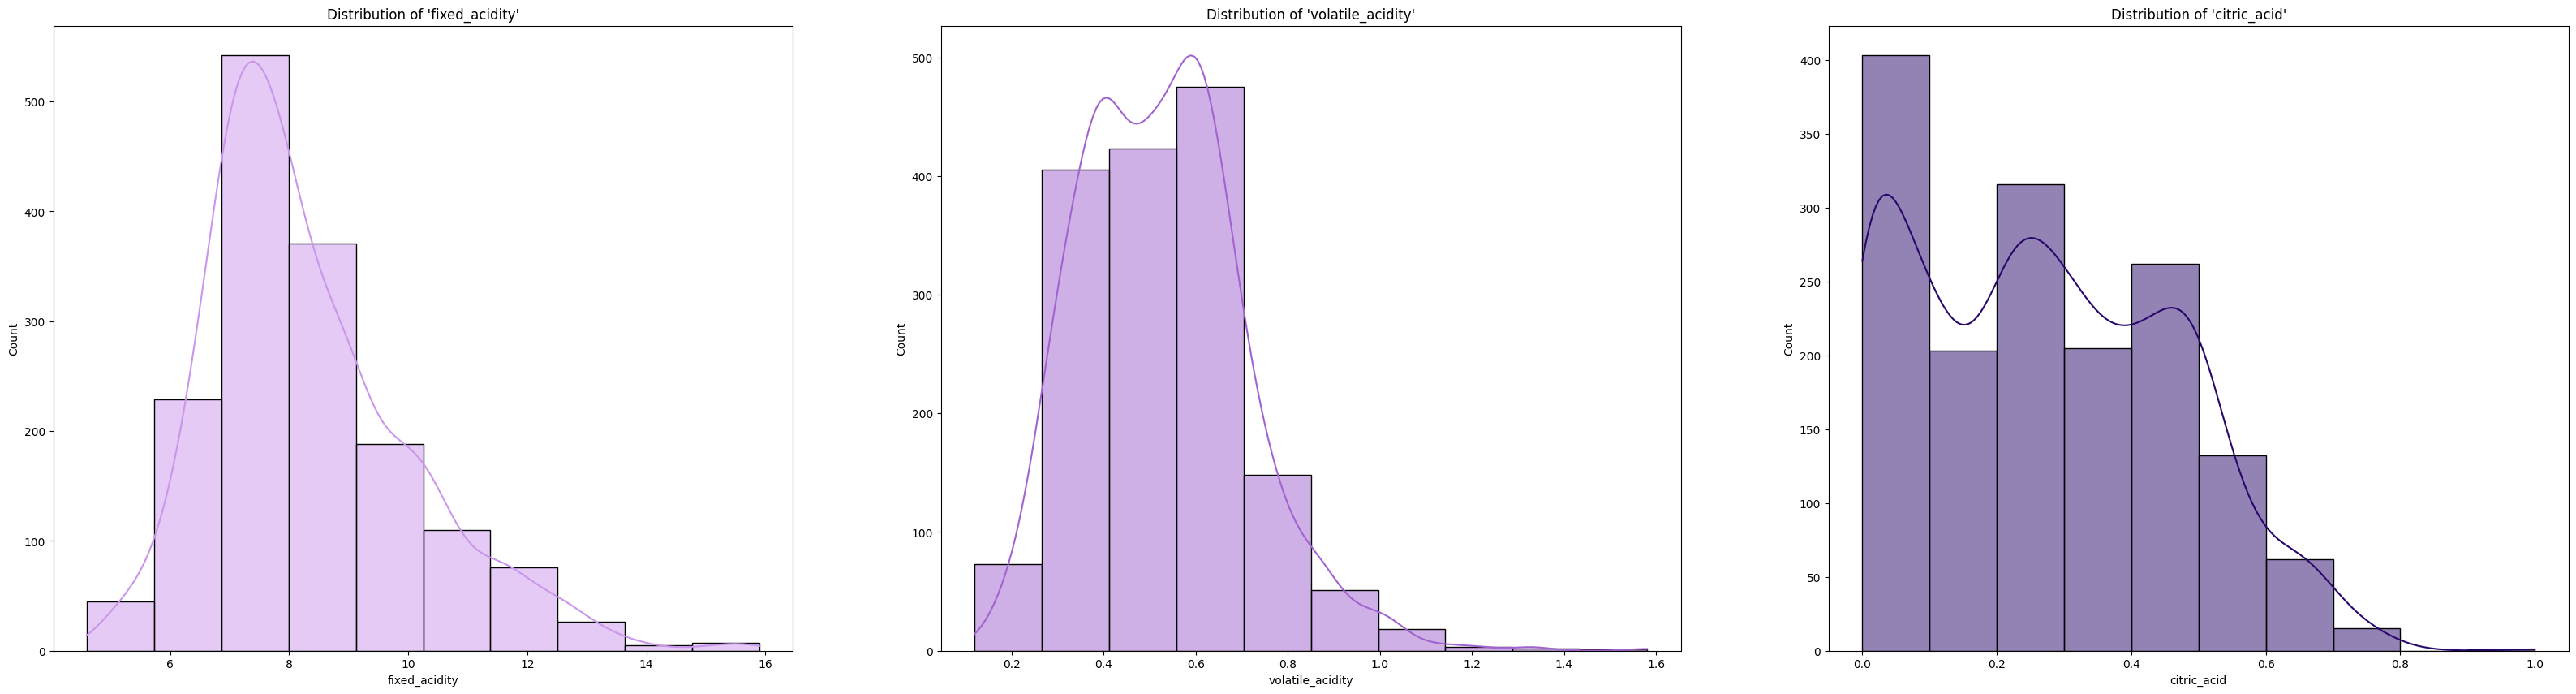

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))

sns.histplot(ax = axes[0], x = df["fixed_acidity"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'fixed_acidity'");

sns.histplot(ax = axes[1], x = df["volatile_acidity"],
             bins = 10,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'volatile_acidity'");

sns.histplot(ax = axes[2], x = df["citric_acid"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'citric_acid'");

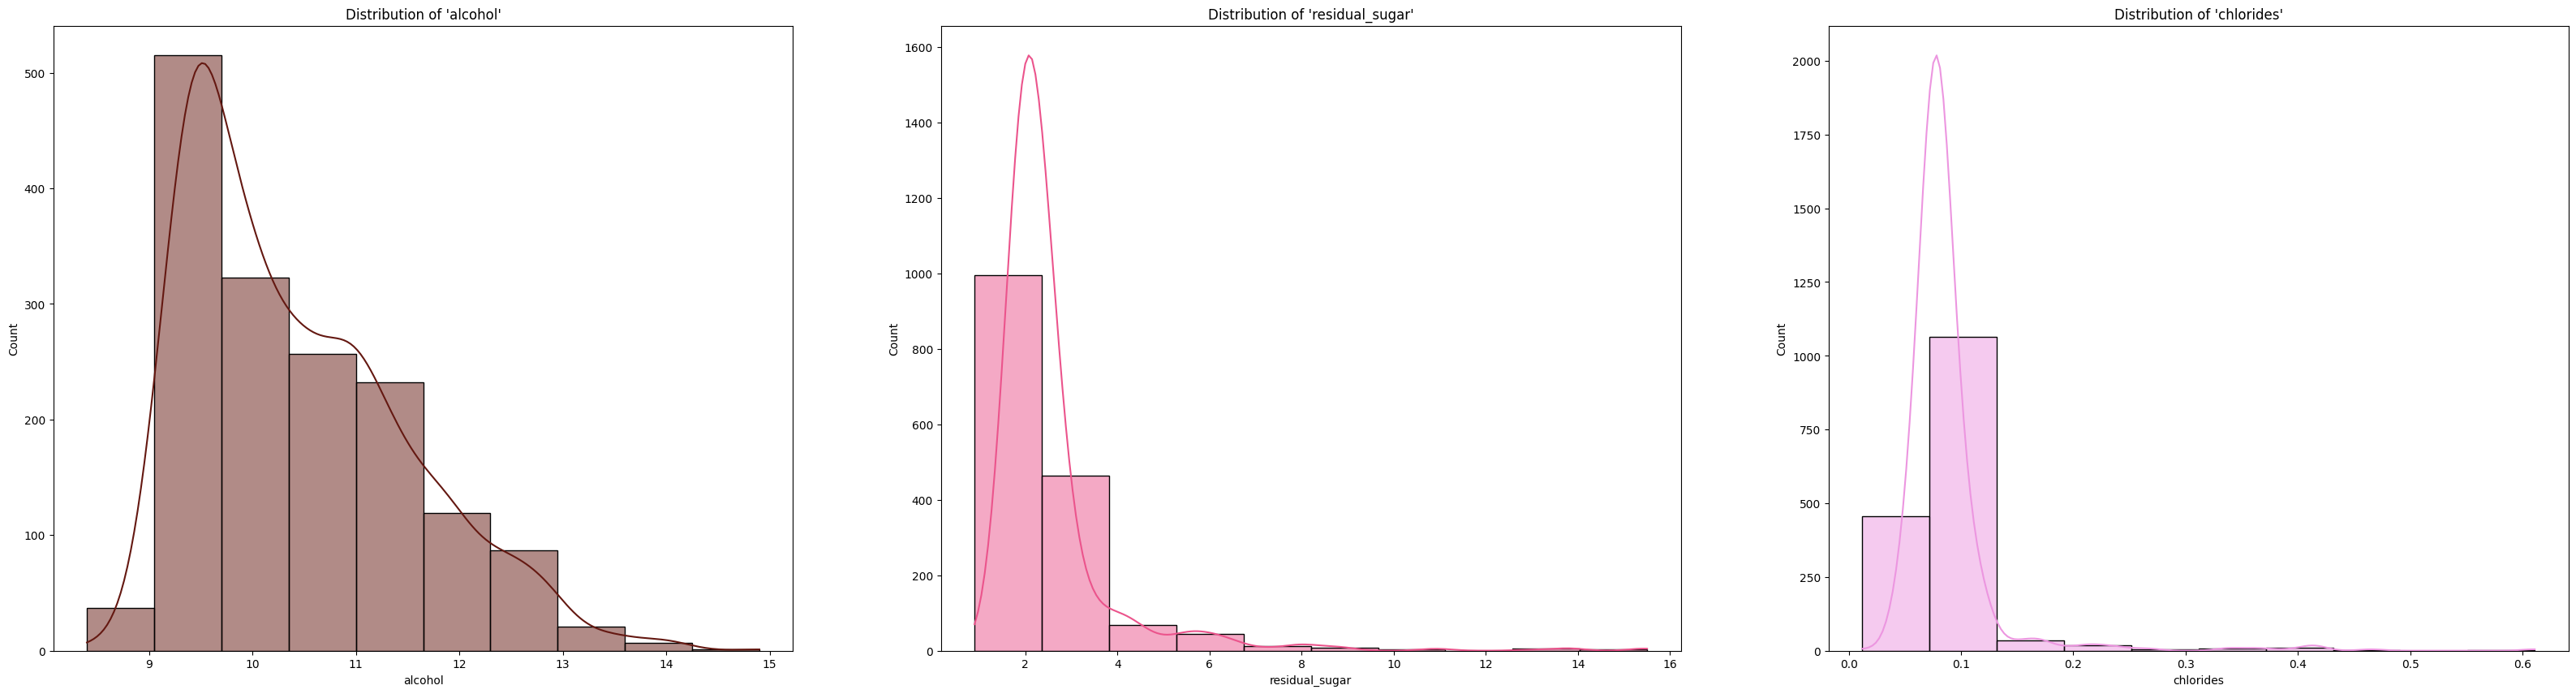

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

sns.histplot(ax = axes[0], x = df["alcohol"],
             bins = 10,    
             kde = True,
             cbar = True,
             color = "#641811").set(title = "Distribution of 'alcohol'");

sns.histplot(ax = axes[1], x = df["residual_sugar"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#EB548C").set(title = "Distribution of 'residual_sugar'");

sns.histplot(ax = axes[2], x = df["chlorides"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#EC96E0").set(title = "Distribution of 'chlorides'");

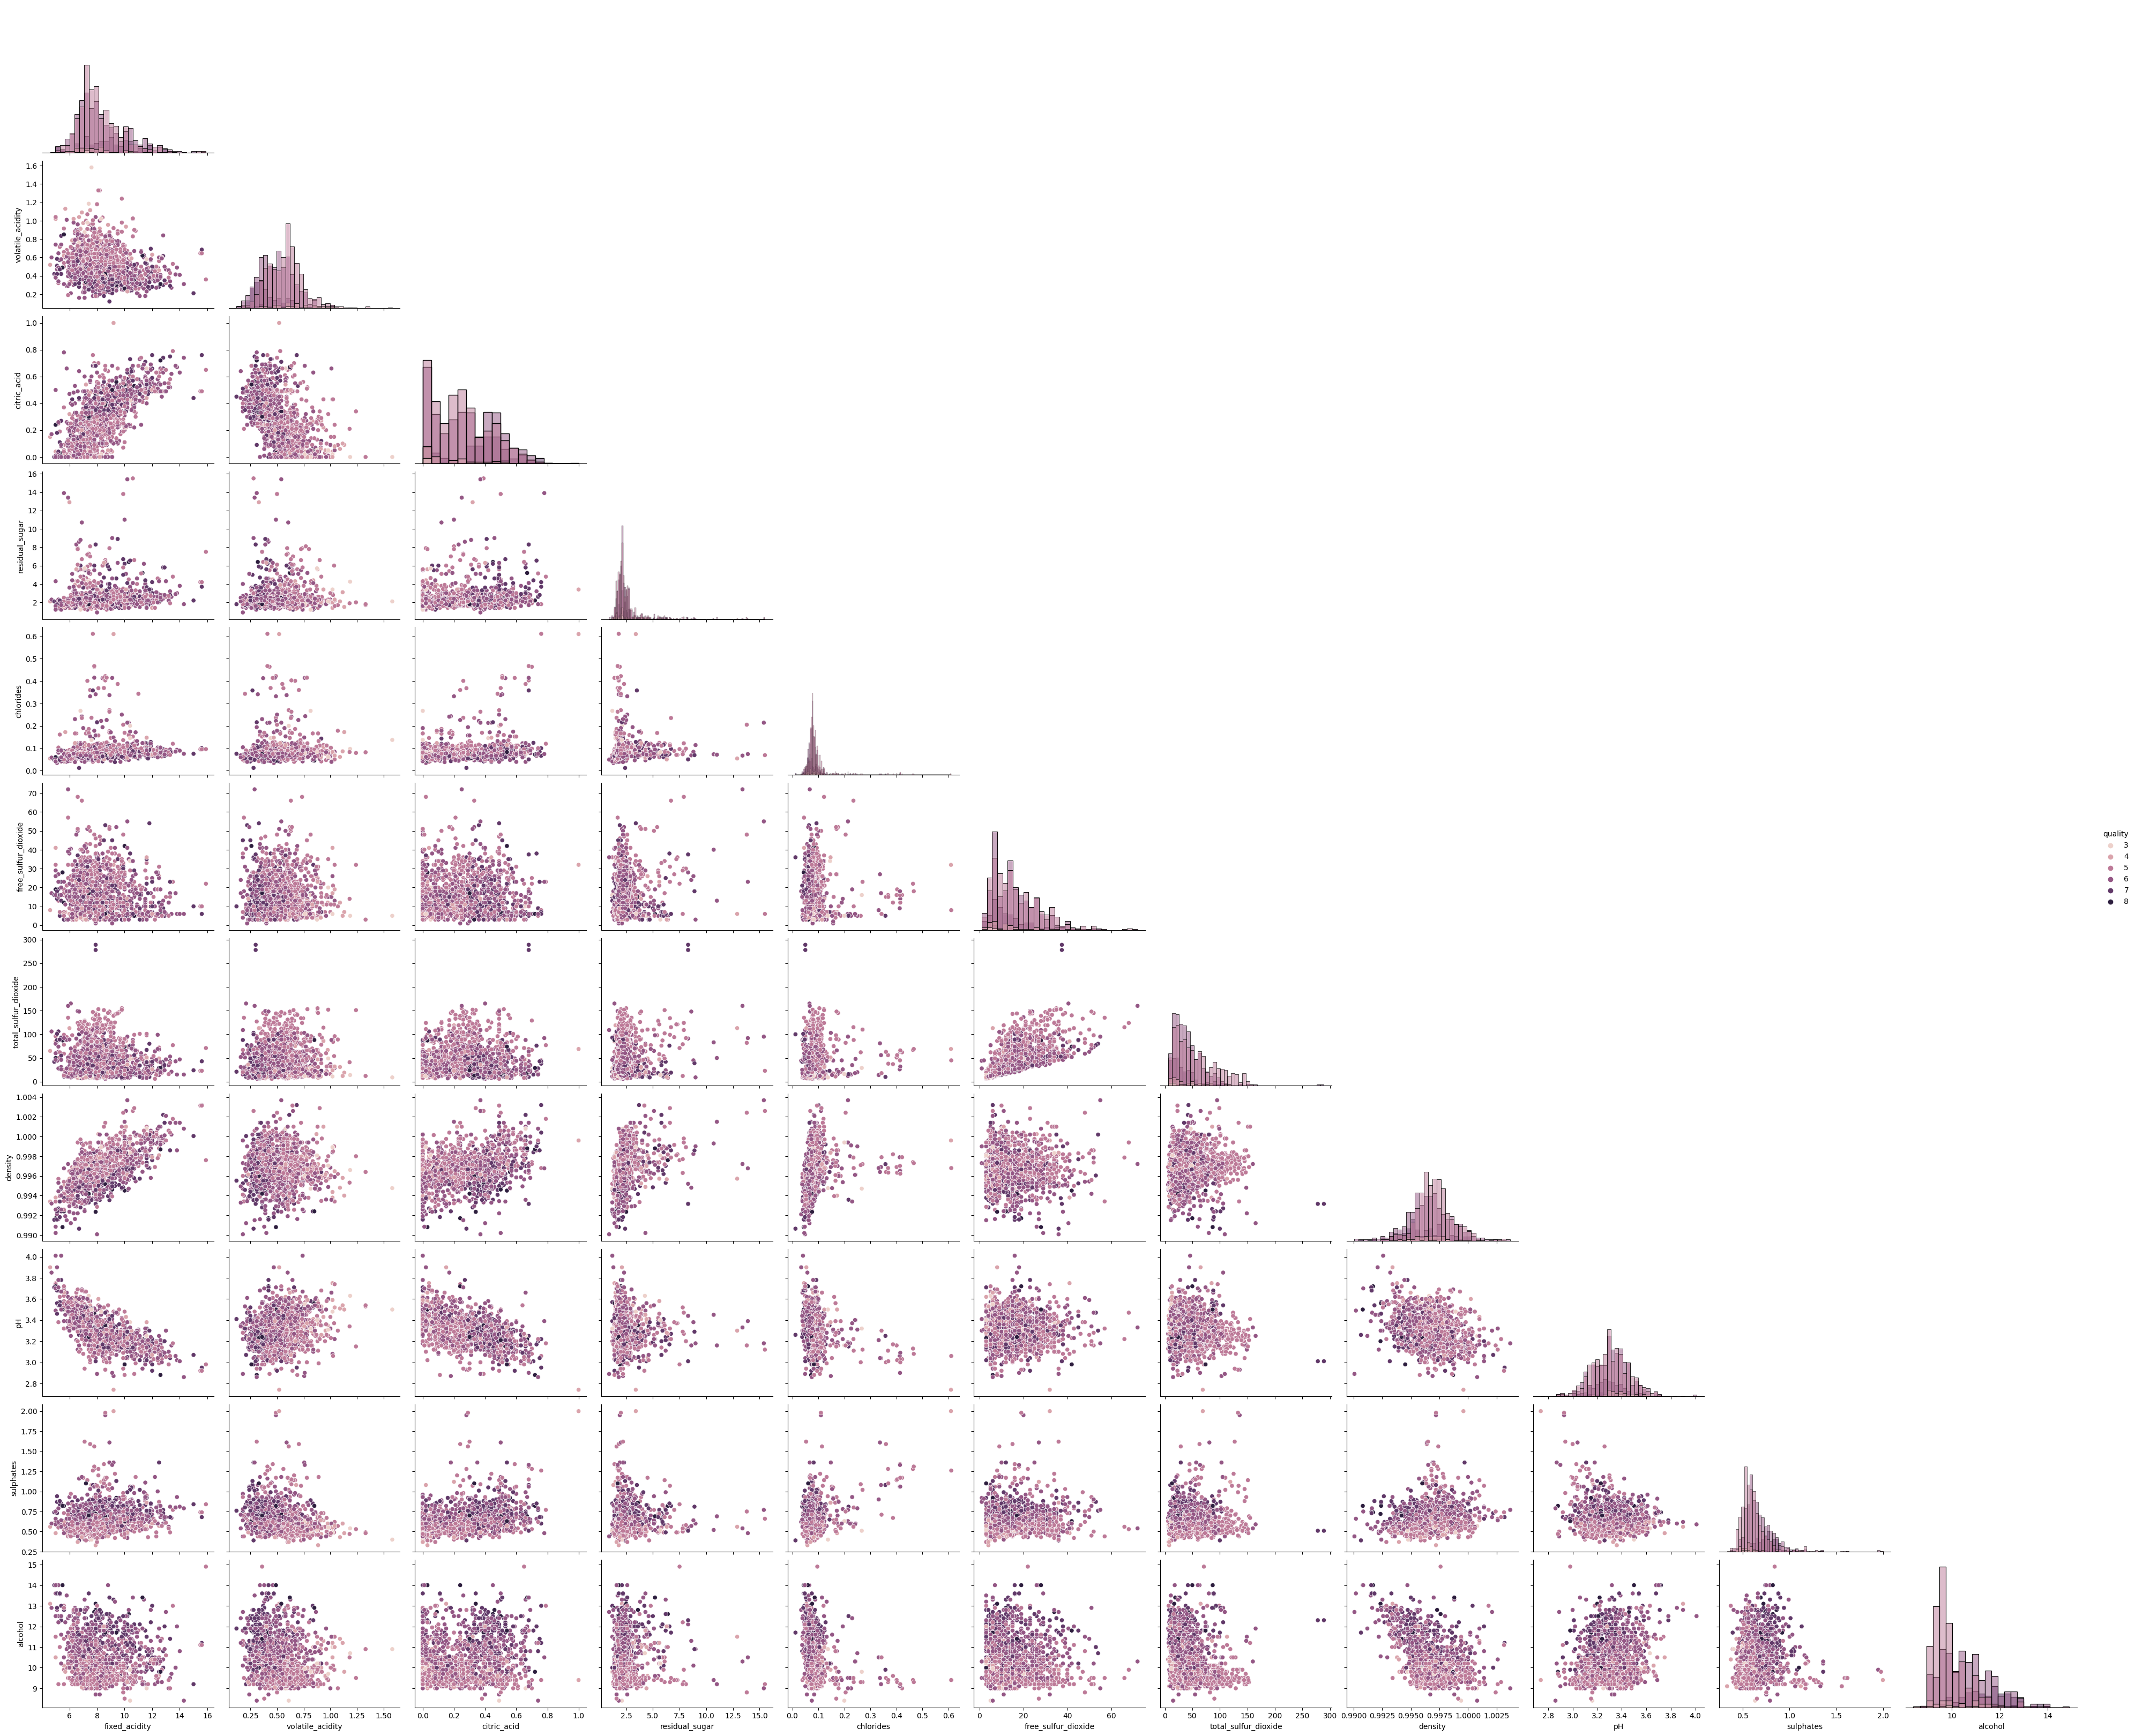

In [11]:
sns.pairplot(df, diag_kind = "hist", hue = "quality", height = 3, aspect = 1.2, corner = True);

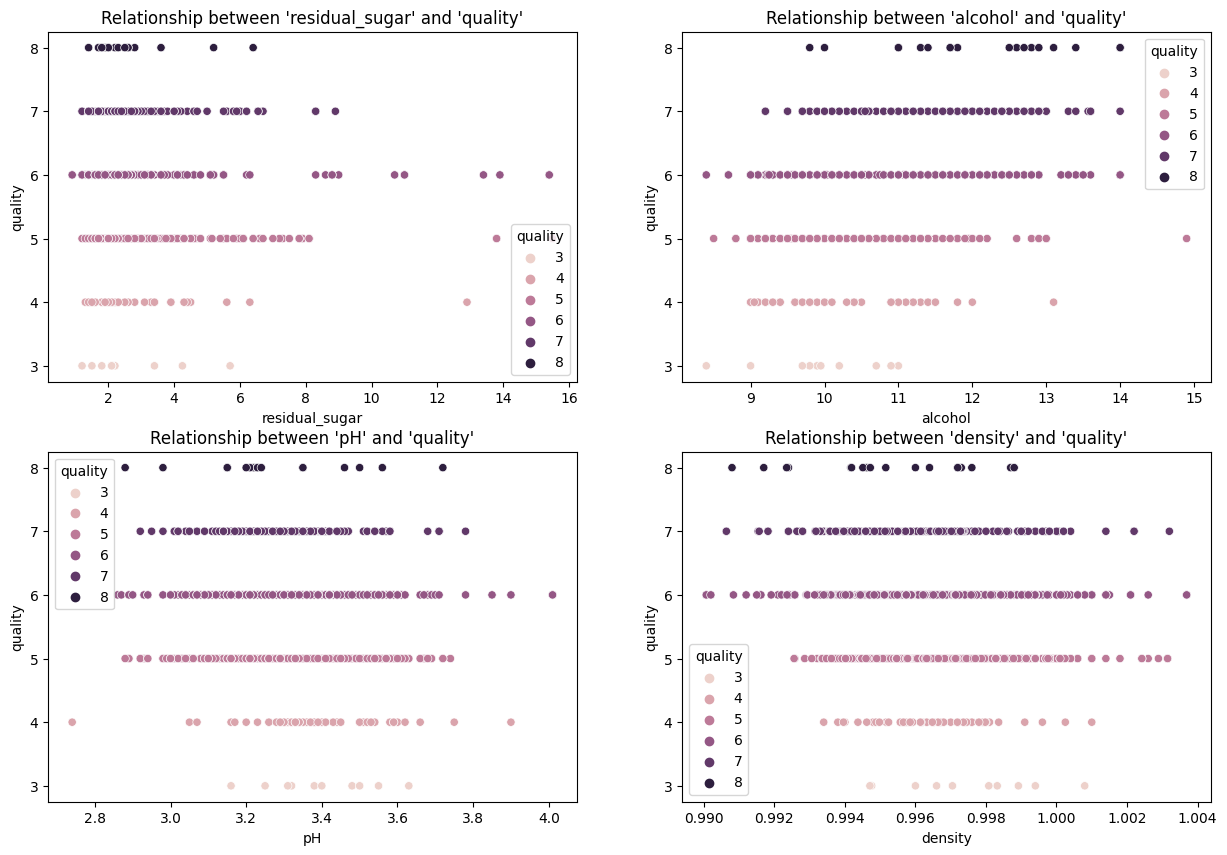

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "residual_sugar",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'alcohol' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "pH",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "density",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'density' and 'quality'");

[Text(0.5, 1.0, "Relationship between 'density' and 'quality'")]

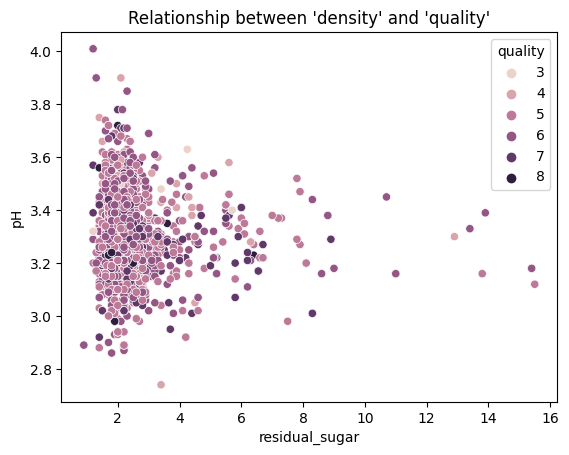

In [13]:
sns.scatterplot(x = "residual_sugar",
                y = "pH",
                hue = "quality",
                data = df).set(title= "Relationship between 'density' and 'quality'")

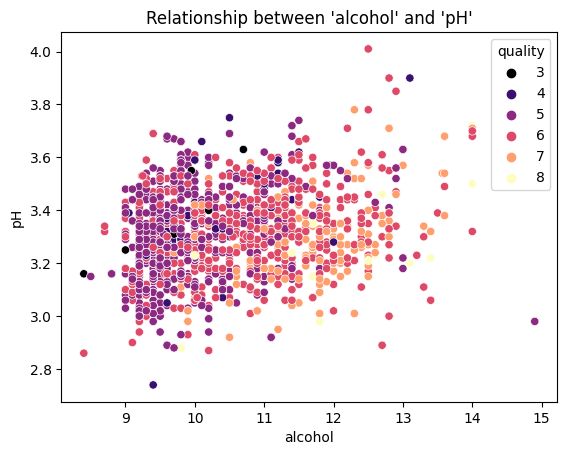

In [14]:
sns.scatterplot(x = "alcohol",
                y = "pH",
                hue = "quality",
                palette = "magma",
                data = df).set(title = "Relationship between 'alcohol' and 'pH'");

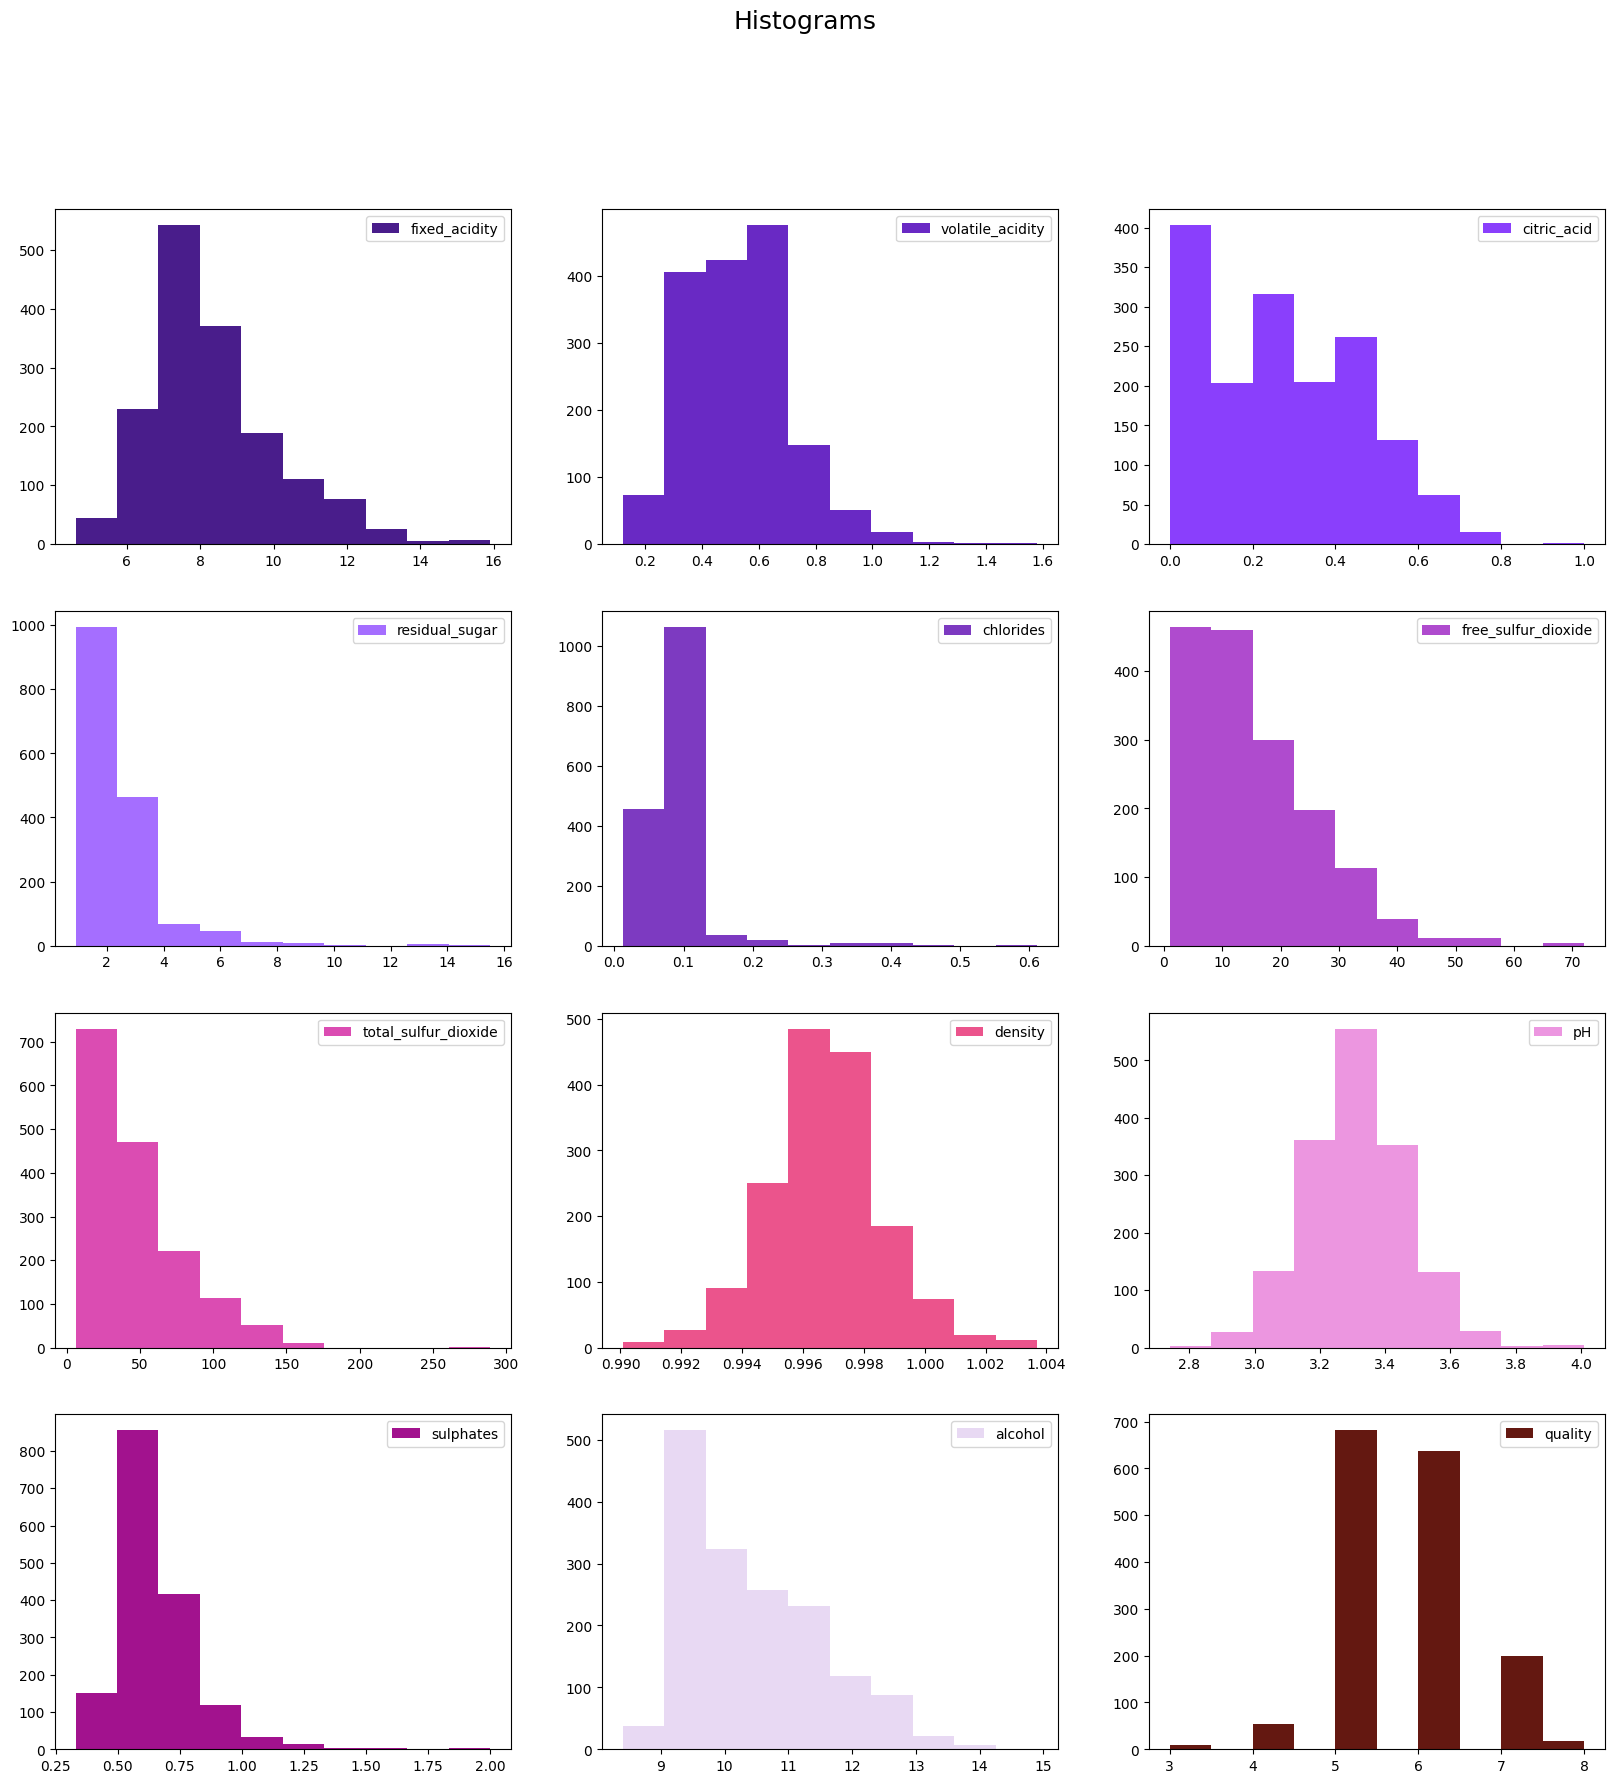

In [15]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

for index, column in enumerate(df.columns):
    ax = axes.flatten()[index]
    ax.hist(df[column], color = colors[index], label = column)
    ax.legend(loc = "best")
plt.suptitle("Histograms", size = 18)

plt.show()

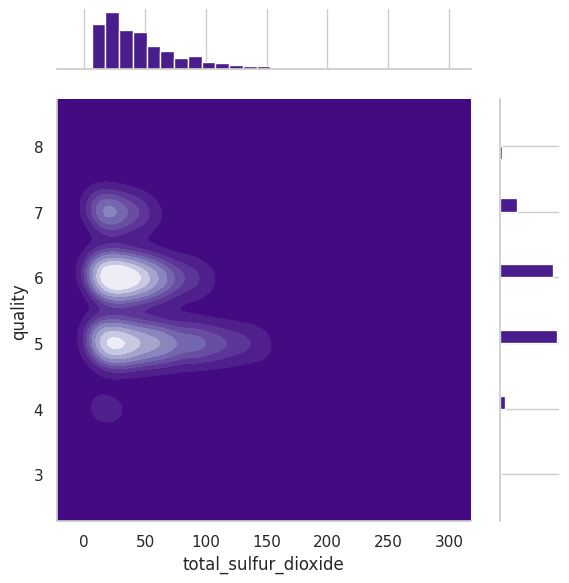

In [16]:
sns.set_theme(style = "whitegrid")
g = sns.JointGrid(data = df, x = "total_sulfur_dioxide", y = "quality", space = 0.5)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "Purples_r")
g.plot_marginals(sns.histplot, color = "#491D8B", alpha = 1, bins = 25);

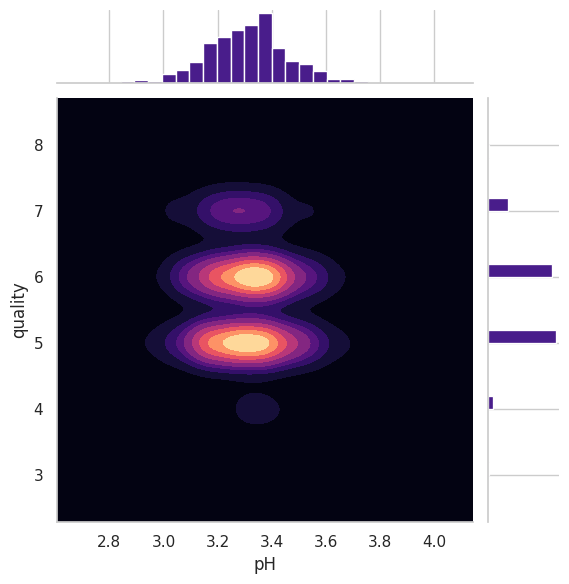

In [17]:
g = sns.JointGrid(data = df, x = "pH", y = "quality", space = 0.2)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "magma")
g.plot_marginals(sns.histplot, color = "#491D8B", alpha = 1, bins = 25);


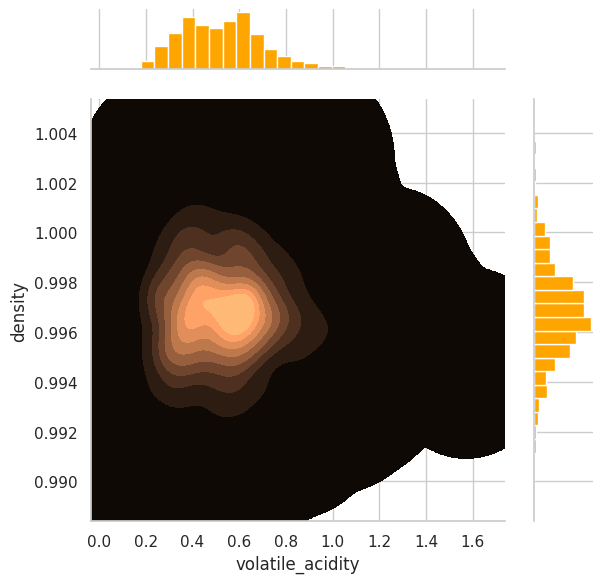

In [18]:
g = sns.JointGrid(data = df, x = "volatile_acidity", y = "density", space = 0.5)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "copper")
g.plot_marginals(sns.histplot, color = "#FFA500", alpha = 1, bins = 25);

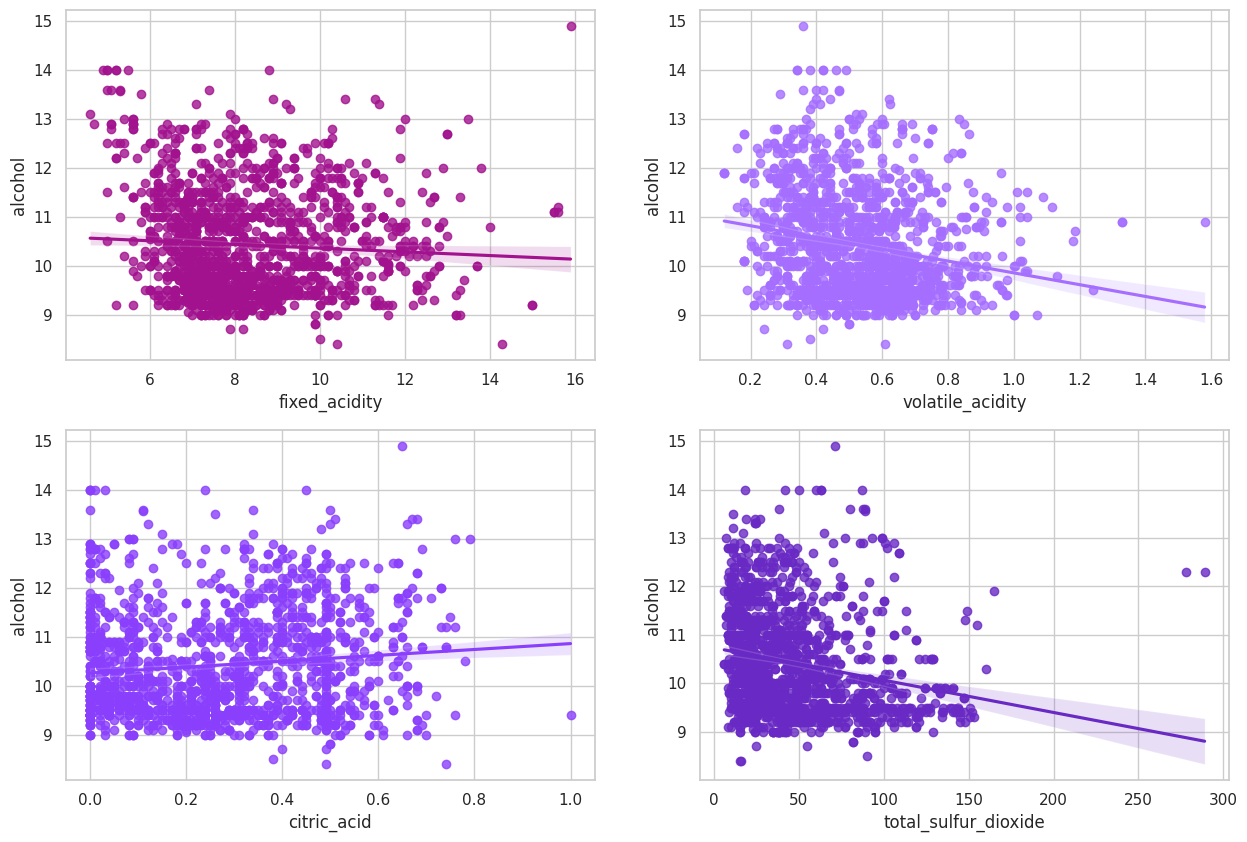

In [19]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "fixed_acidity", y = "alcohol", data = df, color = "#A2128E");
sns.regplot(ax = axes[1], x = "volatile_acidity", y = "alcohol", data = df, color = "#A56EFF");
sns.regplot(ax = axes[2], x = "citric_acid", y = "alcohol", data = df, color = "#8A3FFC");
sns.regplot(ax = axes[3], x = "total_sulfur_dioxide", y = "alcohol", data = df, color = "#6929C4");

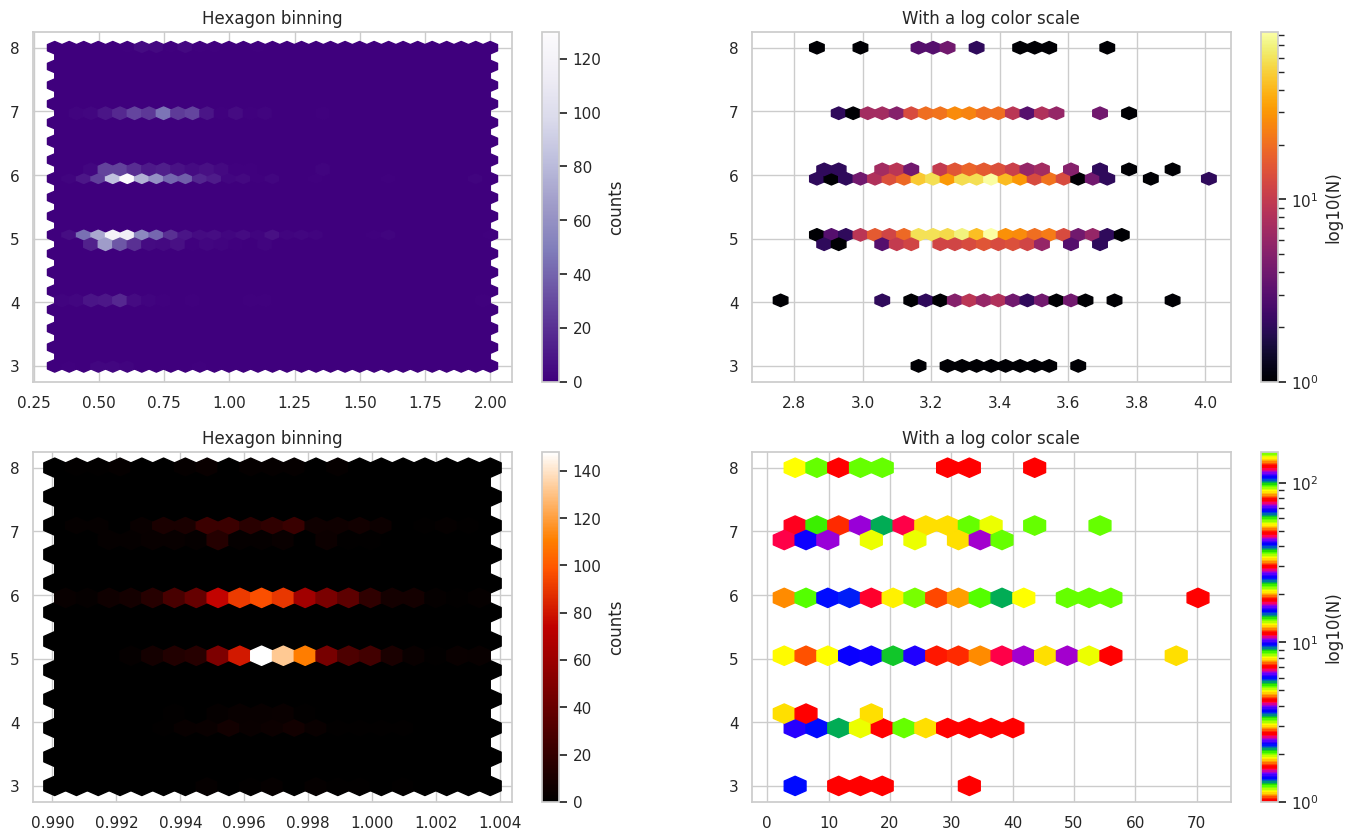

In [20]:
fig, ([ax0, ax1], [ax2, ax3]) = plt.subplots(nrows = 2, ncols = 2, figsize = (17, 10))

hb = ax0.hexbin(df["sulphates"], df["quality"], gridsize = 30, cmap = 'Purples_r')
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax = ax0, label = 'counts')


hb = ax1.hexbin(df["pH"], df["quality"], gridsize = 30, bins = 'log', cmap = 'inferno')
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax = ax1, label = 'log10(N)')


hb = ax2.hexbin(df["density"], df["quality"], gridsize = 20, cmap = 'gist_heat')
ax2.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax = ax2, label = 'counts')

hb = ax3.hexbin(df["free_sulfur_dioxide"], df["quality"], gridsize = 20, bins = 'log',
                cmap = 'prism')
ax3.set_title("With a log color scale")
cb = fig.colorbar(hb, ax = ax3, label = 'log10(N)')

plt.show()

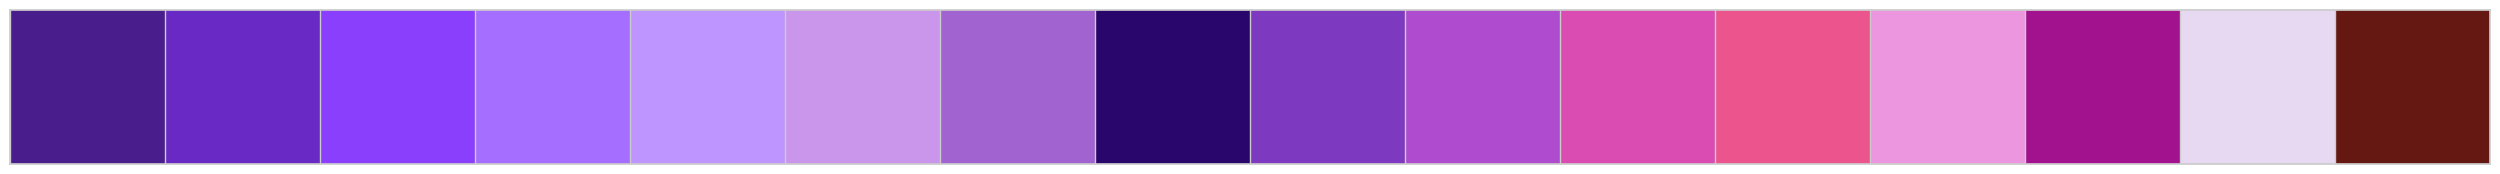

In [21]:
purple = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

sns.palplot(purple, size = 2)

In [22]:
fig = px.histogram(df, x = "residual_sugar", y = "quality", marginal = "box",
                   color = None, text_auto = True, hover_data  = df.columns)
fig.show()


In [23]:
fig = px.density_heatmap(df, x = "pH", y = "quality", z = "residual_sugar",
                         color_continuous_scale = "magma", text_auto = True)
fig.show()


In [24]:
fig = px.density_heatmap(df, x = "density", y = "quality", z = "chlorides",
                        color_continuous_scale = "Viridis", text_auto = True)
fig.show()

In [25]:
fig = px.density_heatmap(df, x = "chlorides", y = "quality", text_auto = True,
                         color_continuous_scale = "sunsetdark")
fig.show()

In [26]:
data = df
fig = go.Figure(data = [go.Surface(z = data.values)])
fig.update_layout(autosize = True, width = 600, height = 600)

fig.show()

In [27]:
data = df[["residual_sugar", "density", "sulphates", "chlorides", "quality"]]

fig = go.Figure(data = [go.Surface(z = data.values)])
fig.update_layout(autosize = True, width = 600, height = 600)

fig.show()

In [28]:
subject = df["quality"]
score = df["alcohol"]

data = [dict(x = subject, y = score, mode = "markers", type = "scatter",
             transforms = [dict(type = "groupby", groups = subject)])]

fig_dict = dict(data = data)
pio.show(fig_dict, validate = False)

In [29]:
subject = df["quality"]
score = df["pH"]

data = [dict(x = subject, y = score, mode = "markers", type = "scatter",
             transforms = [dict(type = "groupby", groups = subject)])]

fig_dict = dict(data = data)
pio.show(fig_dict, validate = False)


In [30]:
subject = df["quality"]
score = df["chlorides"]

data = [dict(x = subject, y = score, mode = "markers", type = "scatter",
             transforms = [dict(type = "groupby", groups = subject)])]

fig_dict = dict(data = data)
pio.show(fig_dict, validate = False)

In [31]:
fig = px.ecdf(df, x = "alcohol", log_x = True, log_y = True, color = "quality")
fig.show()


In [32]:
fig = px.ecdf(df, x = "citric_acid", log_x = True, log_y = True, color = "quality")
fig.show()

In [33]:
fig = px.ecdf(df, x = ["pH", "sulphates", "alcohol"],
              marginal = "histogram", markers = False)
fig.show()

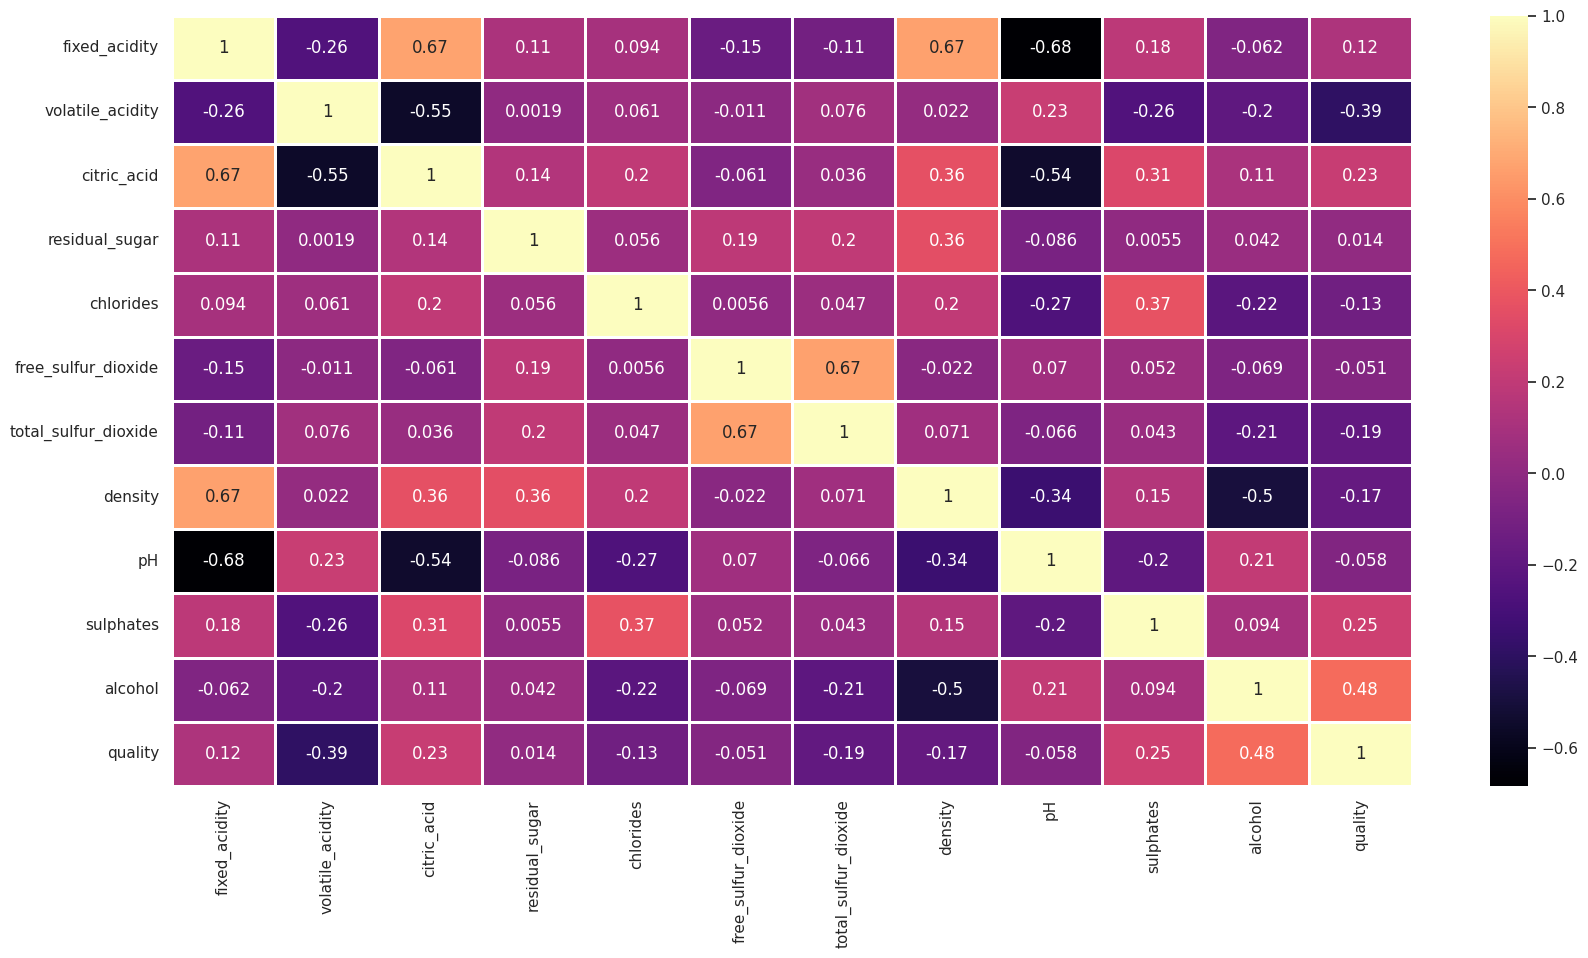

In [34]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");

In [35]:
list = (df[["alcohol","density"]].corr(), df[["fixed_acidity","pH"]].corr(),
        df[["citric_acid","pH"]].corr(), df[["fixed_acidity","density"]].corr(),
        df[["free_sulfur_dioxide","total_sulfur_dioxide"]].corr())
for corr in list:
    print(corr, "\n\n")

         alcohol  density
alcohol  1.00000 -0.49618
density -0.49618  1.00000 


               fixed_acidity        pH
fixed_acidity       1.000000 -0.682978
pH                 -0.682978  1.000000 


             citric_acid        pH
citric_acid     1.000000 -0.541904
pH             -0.541904  1.000000 


               fixed_acidity   density
fixed_acidity       1.000000  0.668047
density             0.668047  1.000000 


                      free_sulfur_dioxide  total_sulfur_dioxide
free_sulfur_dioxide              1.000000              0.667666
total_sulfur_dioxide             0.667666              1.000000 




In [36]:
#Look at dataset
df.head().style.background_gradient(cmap = "Purples_r")

In [37]:
#High quality wine: 6-8 Low quality wine: 3-5
df["quality"] = np.where(df["quality"] > 5, 1, 0)
df["quality"]

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [38]:
#Look at Dataset with changed quality variable
df.head().style.background_gradient(cmap = "Reds")

In [39]:
# select dependent variable 
y = df["quality"]

# select independent variable
x = df.drop("quality", axis = 1)

In [40]:
#Split dataset into Train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)

In [41]:
#Standardization
#No StandardScaler becasue dataset is not distributed normally
norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

In [42]:
#print variables to test if estimator transforms feature into range of 0-1
print(x_train[0:5])
print("\n")
print(x_train.shape)
print("_________________________________________________________________________")
print(x_test[0:5])
print("\n")
print(x_test.shape)

[[0.23893805 0.1369863  0.23       0.10769231 0.090301   0.47887324
  0.23529412 0.4441896  0.54330709 0.17365269 0.26153846]
 [0.32743363 0.38013699 0.26       0.09230769 0.12040134 0.14084507
  0.13602941 0.57568807 0.4488189  0.11976048 0.12307692]
 [0.69911504 0.17808219 0.6        0.13076923 0.11538462 0.42253521
  0.24264706 0.72859327 0.28346457 0.23952096 0.32307692]
 [0.36283186 0.44178082 0.22       0.10769231 0.08695652 0.11267606
  0.13235294 0.47629969 0.28346457 0.13173653 0.15384615]
 [0.32743363 0.49657534 0.01       0.1        0.09698997 0.05633803
  0.02941176 0.50688073 0.45669291 0.1497006  0.4       ]]


(1199, 11)
_________________________________________________________________________
[[0.37168142 0.19863014 0.64       0.1        0.13545151 0.11267606
  0.13235294 0.65214067 0.62992126 0.19760479 0.32307692]
 [0.36283186 0.34931507 0.28       0.13846154 0.14046823 0.22535211
  0.23161765 0.5558104  0.40944882 0.17964072 0.27692308]
 [0.51327434 0.15068493 0.58  

In [43]:
print(y_train.head())
print(y_train.shape)
print("___________________________")
print(y_test.head())
print(y_test.shape)

1144    0
73      0
446     0
399     0
647     0
Name: quality, dtype: int64
(1199,)
___________________________
75      0
1283    1
408     1
1281    1
1118    1
Name: quality, dtype: int64
(400,)


In [44]:
knn = KNeighborsClassifier()

In [45]:
#Searching the best hyperparametres with GridSearchCV method
knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             n_jobs=None,
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
#Get Best Parameters of KNN Model
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

Best score for train set: 0.798172268907563
____________________________________________
best K value: 21 
best weights: distance 
best leaf size: 25


In [47]:
#Searching the best hyperparametres with GridSearchCV method
knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             n_jobs=None,
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
#Get Best Parameters of KNN Model
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

Best score for train set: 0.798172268907563
____________________________________________
best K value: 21 
best weights: distance 
best leaf size: 25


In [49]:
#Build KNN Model with Best Parameters
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='distance')

In [50]:
#Accuracy Score of KNN Model on Test set
y_pred = knn_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8025

In [51]:
#Classification report on KNN model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       188
           1       0.82      0.80      0.81       212

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



In [52]:
gbm = GradientBoostingClassifier()

In [53]:
gbm_params = {"learning_rate": [0.005, 0.008, 0.1, 0.15],
              "n_estimators": [80, 100, 150, 200],
              "max_depth": [2, 3, 4],
              "min_samples_split": [2, 3, 4]}

gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1)
gbm_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='log_loss', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  random_state=None,
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False),
             n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.008, 0.1, 0.15],
                         'max_depth': [2, 3, 4], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [80, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
print("Best score for train set: " + str(gbm_cv_model.best_score_))

print("__________________________________________________________")

print("best learning_rate value: " + str(gbm_cv_model.best_params_["learning_rate"]),
     "\nbest n_estimators value: " + str(gbm_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(gbm_cv_model.best_params_["max_depth"]),
     "\nbest min_samples_split value: " + str(gbm_cv_model.best_params_["min_samples_split"]))

Best score for train set: 0.8098459383753502
__________________________________________________________
best learning_rate value: 0.1 
best n_estimators value: 100 
best max_depth value: 4 
best min_samples_split value: 2


In [55]:
gbm = GradientBoostingClassifier(learning_rate = gbm_cv_model.best_params_["learning_rate"],
                                 max_depth = gbm_cv_model.best_params_["max_depth"],
                                 n_estimators = gbm_cv_model.best_params_["n_estimators"],
                                 min_samples_split = gbm_cv_model.best_params_["min_samples_split"])
gbm_model = gbm.fit(x_train, y_train)

In [56]:
#accuracy
y_pred = gbm_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7775

In [57]:
#Class report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       188
           1       0.81      0.76      0.78       212

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



In [58]:
lgbm = LGBMClassifier()

In [59]:
lgbm_params = {"n_estimators": [80, 100, 120, 150, 200],
              "max_depth": [-1, 3, 4],
              "learning_rate": [0.05, 0.08, 0.1, 0.12, 0.15, 0.18],
              "min_child_samples": [15, 20, 25, 30]}


lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 10, n_jobs = -1)
lgbm_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent='warn',
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.08, 0.1, 0.12, 0.15, 0.18],
                         'max_depth': [-1, 3, 4],
                         'min_child_samples': [15, 20, 25, 30],
                         'n_estimators': [80, 100, 120, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
# To get and show the best hyperparametres

print("Best score for train set: " + str(lgbm_cv_model.best_score_))

print("____________________________________________")

print("best learning_rate value: " + str(lgbm_cv_model.best_params_["learning_rate"]),
     "\nbest n_estimators value: " + str(lgbm_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(lgbm_cv_model.best_params_["max_depth"]),
     "\nbest min_child_samples value: " + str(lgbm_cv_model.best_params_["min_child_samples"]))

Best score for train set: 0.8065056022408964
____________________________________________
best learning_rate value: 0.05 
best n_estimators value: 100 
best max_depth value: -1 
best min_child_samples value: 20


In [61]:
lgbm = LGBMClassifier(learning_rate = lgbm_cv_model.best_params_["learning_rate"],
                      max_depth = lgbm_cv_model.best_params_["max_depth"],
                      n_estimators = lgbm_cv_model.best_params_["n_estimators"],
                      min_child_samples = lgbm_cv_model.best_params_["min_child_samples"])
lgbm_model = lgbm.fit(x_train, y_train)

In [62]:
#Accuracy
y_pred = lgbm_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8125

In [63]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       188
           1       0.85      0.78      0.81       212

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



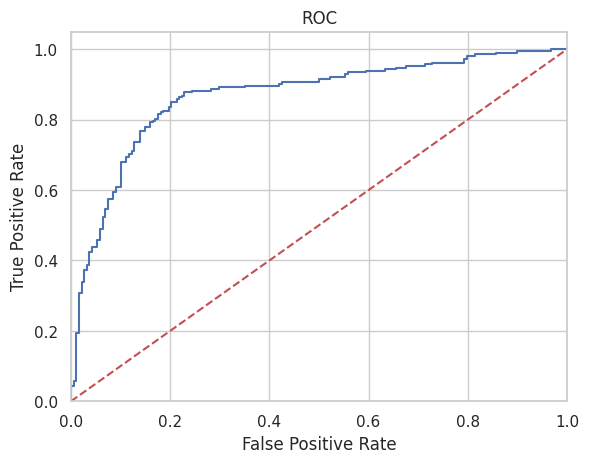

In [64]:
lgbm_roc_auc = roc_auc_score(y_test, lgbm_model.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, lgbm_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()